In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [5]:
df = pd.read_excel('datos tarea 2 alumnos.xlsx', header = 1)
df.head()

,Fecha,Día,Casos totales,Casos recuperados,Fallecidos,Removidos (recup+fallec)
0,2020-03-03,1,1,0,0,0
1,2020-03-04,2,3,0,0,0
2,2020-03-05,3,4,0,0,0
3,2020-03-06,4,5,0,0,0
4,2020-03-07,5,7,0,0,0


In [9]:
print('Fecha de inicio: ',df['Fecha'][0],'\n')
print('Fecha de término: ',list(df['Fecha'])[-1])

Fecha de inicio:  2020-03-03 00:00:00 

Fecha de término:  2020-06-01 00:00:00


## Funciones a ocupar:

1. Función regresiva:
$$ I(t;\alpha,\beta,\sigma) = \frac{\alpha}{1 + \beta e^{-t/\sigma}}$$

2. Función de error:
$$f(\alpha,\beta,\sigma) = \sum_{t=1}^N \left(I(t) - \frac{\alpha}{1 + \beta e^{-t/\sigma}}\right)^2$$

3. Derivada de I:
$$ \frac{d}{dt} I(t,\alpha,\beta,\sigma) = \frac{\alpha\beta e^{-t/\sigma}}{\sigma(1 + \beta e^{-t/\sigma})^2}$$

### Parte a.
Imponiendo las restricciones que usted estime naturales para los parámetros $\alpha$, $\beta$, $\sigma$, encuentre una función de ajuste $I(t; \alpha,\beta,\sigma)$ y estime el máximo total de infectados a largo plazo. Diga en qué fecha se producirá el máximo de infectados nuevos.

Notamos que el signo de la función $I$ dependerá de $\alpha$ y $\beta$, por lo tanto es escencial que $\alpha ,\beta>0$, puesto que no puede haber signos negativos de infectados.

In [3]:
## Función I
I = lambda t,alfa,beta,sigma: alfa/(1 + beta*np.exp(-t/sigma))

## definir el error

def Error(D,C,I,a,b,s):
    '''
    I: función de parámetros t,alfa,beta,sigma
    D: vector de días, valores del data set (np.array)
    C: vector de casos totales en función de D, En este caso C = I(D,alfa,beta,sigma) (np.array)
    a == alfa propuesto
    b ==  beta propuesto
    s == sigma propuesto
    '''
    f = lambda t: I(t,a,b,s)
    Valor_estimado = f(D)
    eps = (C-Valor_estimado)**2
    return np.sum(eps)

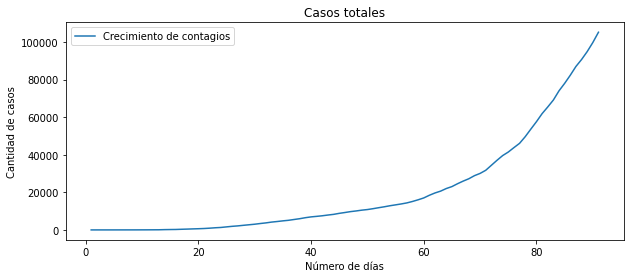

In [4]:
D = np.array(df['Día'])
C = np.array(df['Casos totales'])

plt.figure(figsize = (10,4))
plt.plot(D,C, label = 'Crecimiento de contagios')
plt.title('Casos totales')
plt.xlabel('Número de días')
plt.ylabel('Cantidad de casos')
plt.legend()

In [ ]:
BE = np.linspace(0.1,1e10,10000)
SI = np.linspace(0.1,1e10,10000)

al = 5.17953333e+06

A = np.zeros([10000,10000])
for i in range(10000):
    for j in range(10000):
        A[i,j] = Error(D,C,I,al,BE[i],SI[j])

<IPython.core.display.Javascript object>


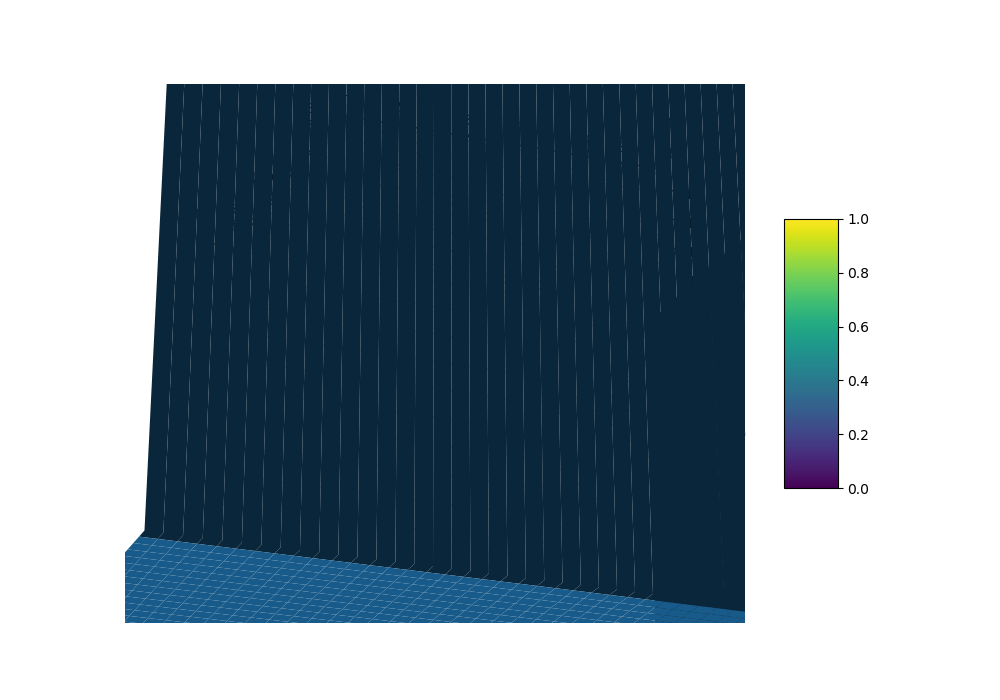

In [67]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, transforms
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib notebook
fig = plt.figure(figsize = (10,7))
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(BE,SI)

surf = ax.plot_surface(X,Y, A)



# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [24]:
plt.plot(B)

72543611867.47614

In [13]:
## Probamos la función para a=b=s =1
a=s=b=1
err = Error(D,C,I,a,b,s)
print('Cantidad del error cuadrático: ', err)

Cantidad del error cuadrático:  105488082466.16678


In [43]:
## Optimización de los parámetros.
#cotas para alfa, beta y gama
lb = [0,0,0]
ub = [np.inf,np.inf,np.inf]
cotas = list(zip(lb,ub))

#función objetivo
objetivo = lambda v: Error(D,C,I,v[0],v[1],v[2])

#minimizar, punto inicial [1,1,1]

mini = minimize(objetivo, [1.,1.,1.], bounds = cotas)
print(mini)

      fun: 101584111.86993478
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.49011612e+00, -4.47034836e+00, -7.24047422e+03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 464
      nit: 60
   status: 0
  success: True
        x: array([5.17953333e+06, 9.95604807e+03, 1.70052816e+01])


C:\Users\paula\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [26]:
xmin = mini.x
print('Valor de alfa: ',xmin[0], '\nValor de beta: ',xmin[1],'\nValor de sigma: ', xmin[2], '\nValor de la función Objativo: ', mini.fun)

Valor de alfa:  5179533.330791675 
Valor de beta:  9956.048072922224 
Valor de sigma:  17.00528163632804 
Valor de la función Objativo:  101584111.86993478


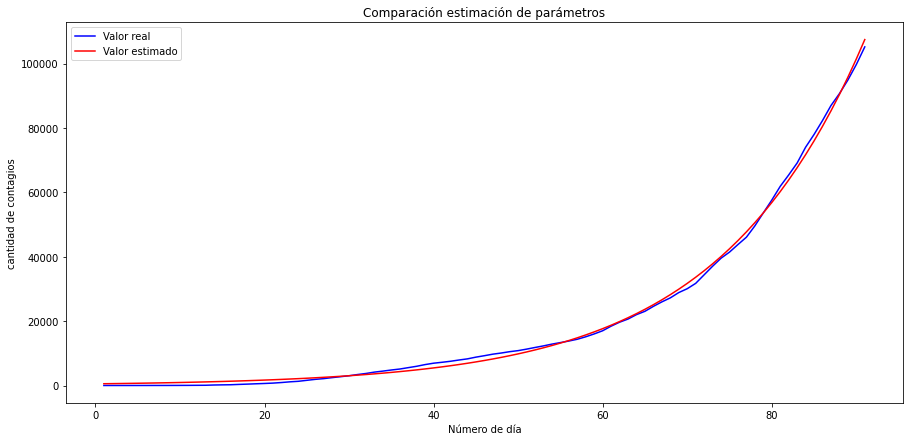

In [44]:
# Comparación de estimaciones
alfa = xmin[0]
beta = xmin[1]
sigma = xmin[2]

f_estimado = lambda t: I(t,alfa,beta,sigma)

plt.figure(figsize = (15,7))
plt.plot(D,C,color ='b',label='Valor real')
plt.plot(D,f_estimado(D),color='r',label='Valor estimado')
plt.title('Comparación estimación de parámetros')
plt.xlabel('Número de día')
plt.ylabel('cantidad de contagios')
plt.legend()

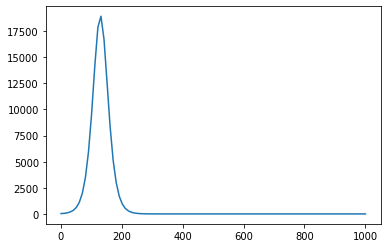

In [38]:
#Función derivada de I, en función de los parámetros obtenidos

I_prim = lambda t: -1*(alfa*beta*np.exp(-t/sigma))/(sigma*(1 +beta*np.exp(-t/sigma))**2)

D2 = np.linspace(1,1000,100,dtype = int)

plt.plot(D2,I_prim(D2))

In [61]:
#como sabemos que la función derivada tiene un máximo global (supondremos que ese máximo es entero xd) haremos lo siguiente:
D2 = np.linspace(1,1001,1000,dtype = int)

dif_max = 0
n_max = 0
for i in D2:
    if i == 1:
        n_max = 1
        dif_max = f_estimado(1)
    elif i==2:
        if f_estimado(2)-f_estimado(1) > dif_max:
            n_max = 2
            dif_max =  f_estimado(2)-f_estimado(1)
    else:
        if f_estimado(i)-f_estimado(i-1)> dif_max:
            n_max = i
            dif_max = f_estimado(i)-f_estimado(i-1)

In [55]:
print('El día de mayores contagios es: ',n_max,'\nY la cantidad de contagios es de: ',dif_max)

El día de mayores contagios es:  157 
Y la cantidad de contagios es de:  76140.30372070242


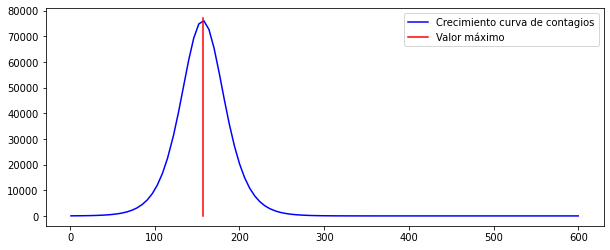

In [65]:
#Función derivada de I, en función de los parámetros obtenidos

I_prim = lambda t: (alfa*beta*np.exp(-t/sigma))/(sigma*(1 +beta*np.exp(-t/sigma))**2)

D2 = np.linspace(1,600,100,dtype = int)
L = np.linspace(0,np.max(I_prim(D2))+1000,len(D2),dtype=int)
N = n_max*np.ones(len(D2))

plt.figure(figsize = (10,4))
plt.plot(D2,I_prim(D2),color = 'b', label = 'Crecimiento curva de contagios')
plt.plot(N,L, color = 'r', label = 'Valor máximo')
plt.legend()

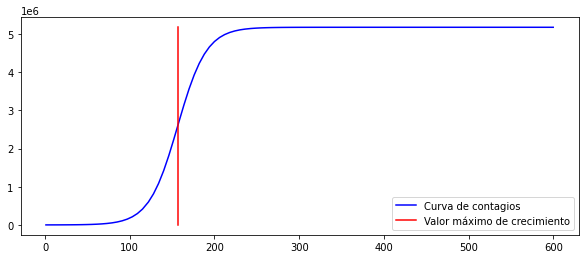

In [67]:
L2 = L = np.linspace(0,np.max(f_estimado(D2))+1000,len(D2),dtype=int)
plt.figure(figsize = (10,4))
plt.plot(D2,f_estimado(D2),color = 'b', label = 'Curva de contagios')
plt.plot(N,L, color = 'r', label = 'Valor máximo de crecimiento')
plt.legend()

In [76]:
dia_critico = df['Fecha'][0] + np.timedelta64(n_max-1,'D')
print('El día de más contagios será el ',dia_critico.day,'\ndel mes ',dia_critico.month)

El día de más contagios será el  6 
del mes  8


### Parte b.

In [87]:
#Definimos el máximo error para cada modelo:

def Error_inf(D,C,I,a,b,s):
    '''
    I: función de parámetros t,alfa,beta,sigma
    D: vector de días, valores del data set (np.array)
    C: vector de casos totales en función de D, En este caso C =aprox=  I(D,alfa,beta,sigma) (np.array)
    a == alfa propuesto
    b ==  beta propuesto
    s == sigma propuesto
    '''
    
    f = lambda t: I(t,a,b,s)
    K = np.abs(C - f(D))
    return np.max(K)

In [88]:
## Probamos la función para a=b=s =1
a=s=b=1
err = Error_inf(D,C,I,a,b,s)
print('Cantidad del error máximo: ', err)

Cantidad del error máximo:  105158.0


In [119]:
## Optimización de los parámetros.
#cotas para alfa, beta y gama
lb = [0,0,0]
ub = [np.inf,np.inf,np.inf]
cotas = list(zip(lb,ub))

#función objetivo
objetivo = lambda v: Error_inf(D,C,I,v[0],v[1],v[2])

#minimizar, punto inicial [1,1,1]

mini2 = minimize(objetivo, [1.,1.,1.], method = "SLSQP" ,bounds = cotas) #Ocupé el método SLSQP que (no se porque xd) apaña y entrega un valor menor
print(mini2)

     fun: 8694.554277220122
     jac: array([ 1.06445312e-01, -9.77895508e+01, -7.28491064e+03])
 message: 'Iteration limit exceeded'
    nfev: 589
     nit: 101
    njev: 100
  status: 9
 success: False
       x: array([3.79459821e+05, 3.69271131e+02, 1.87601636e+01])


C:\Users\paula\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [120]:
xmin2 = mini2.x
print('Valor de alfa: ',xmin2[0], '\nValor de beta: ',xmin2[1],'\nValor de sigma: ', xmin2[2], '\nValor de la función Objativo: ', mini2.fun)

Valor de alfa:  379459.8211201253 
Valor de beta:  369.2711307508892 
Valor de sigma:  18.760163595420877 
Valor de la función Objativo:  8694.554277220122


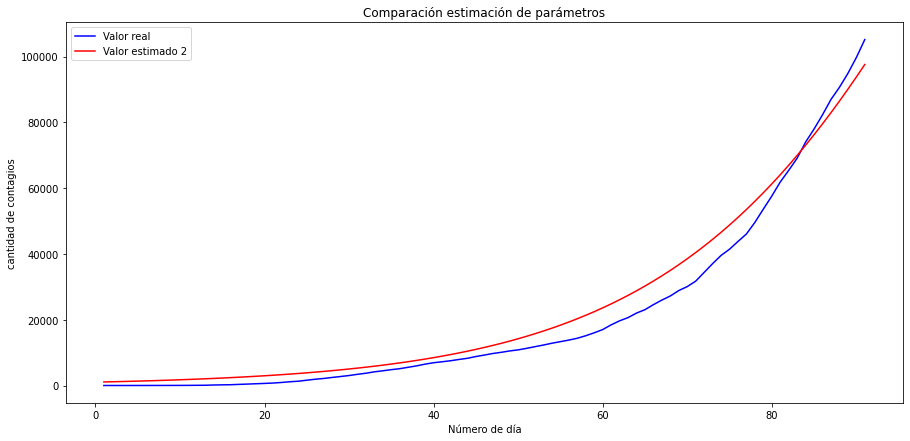

In [121]:
# Comparación de estimaciones
alfa2 = xmin2[0]
beta2 = xmin2[1]
sigma2 = xmin2[2]

f_estimado2 = lambda t: I(t,alfa2,beta2,sigma2)

plt.figure(figsize = (15,7))
plt.plot(D,C,color ='b',label='Valor real')
plt.plot(D,f_estimado2(D),color='r',label='Valor estimado 2')
plt.title('Comparación estimación de parámetros')
plt.xlabel('Número de día')
plt.ylabel('cantidad de contagios')
plt.legend()

In [122]:
#como sabemos que la función derivada tiene un máximo global (supondremos que ese máximo es entero xd) haremos lo siguiente:
D2_2 = np.linspace(1,1001,1000,dtype = int)

dif_max2 = 0
n_max2 = 0
for i in D2_2:
    if i == 1:
        n_max2 = 1
        dif_max2 = f_estimado2(1)
    elif i==2:
        if f_estimado2(2)-f_estimado2(1) > dif_max2:
            n_max2 = 2
            dif_max2 =  f_estimado2(2)-f_estimado2(1)
    else:
        if f_estimado2(i)-f_estimado2(i-1)> dif_max2:
            n_max2 = i
            dif_max2 = f_estimado2(i)-f_estimado2(i-1)
            
print('El día de mayores contagios es: ',n_max2,'\nY la cantidad de contagios es de: ',dif_max2)

El día de mayores contagios es:  111 
Y la cantidad de contagios es de:  5055.845674947806


In [123]:
dia_critico2 = df['Fecha'][0] + np.timedelta64(n_max2-1,'D')
print('El día de más contagios será el ',dia_critico2.day,'\ndel mes ',dia_critico2.month)

El día de más contagios será el  21 
del mes  6


### Parte c.

In [136]:
## Optimización de los parámetros.
#cotas para alfa, beta y gama
lb = [0,0,0]
ub = [250000,np.inf,np.inf] #cota para alfa
cotas = list(zip(lb,ub))

#función objetivo
objetivo = lambda v: Error(D,C,I,v[0],v[1],v[2])

#minimizar, punto inicial [1,1,1]

mini3 = minimize(objetivo, [1.,1.,1.], bounds = cotas)
print(mini3)

      fun: 3979623982.556011
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.67369843e+04,  9.17053223e+05,  8.55648041e+08])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 152
      nit: 14
   status: 0
  success: True
        x: array([2.47789910e+05, 1.56715001e+02, 2.08072260e+01])


C:\Users\paula\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [137]:
xmin3 = mini3.x
print('Valor de alfa: ',xmin3[0], '\nValor de beta: ',xmin3[1],'\nValor de sigma: ', xmin3[2], '\nValor de la función Objativo: ', mini3.fun)

Valor de alfa:  247789.90955921065 
Valor de beta:  156.71500054990298 
Valor de sigma:  20.8072259502345 
Valor de la función Objativo:  3979623982.556011


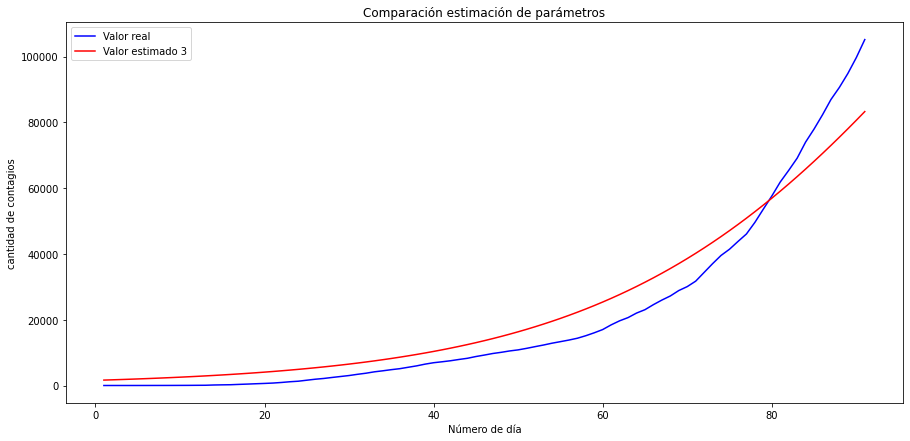

In [138]:
# Comparación de estimaciones
alfa3 = xmin3[0]
beta3 = xmin3[1]
sigma3 = xmin3[2]

f_estimado3 = lambda t: I(t,alfa3,beta3,sigma3)

plt.figure(figsize = (15,7))
plt.plot(D,C,color ='b',label='Valor real')
plt.plot(D,f_estimado3(D),color='r',label='Valor estimado 3')
plt.title('Comparación estimación de parámetros')
plt.xlabel('Número de día')
plt.ylabel('cantidad de contagios')
plt.legend()

In [129]:
## Cambio del día peak
#como sabemos que la función derivada tiene un máximo global (supondremos que ese máximo es entero xd) haremos lo siguiente:
D2 = np.linspace(1,1001,1000,dtype = int)

dif_max3 = 0
n_max3 = 0
for i in D2:
    if i == 1:
        n_max3 = 1
        dif_max3 = f_estimado3(1)
    elif i==2:
        if f_estimado3(2)-f_estimado3(1) > dif_max3:
            n_max3 = 2
            dif_max3 =  f_estimado3(2)-f_estimado3(1)
    else:
        if f_estimado3(i)-f_estimado3(i-1)> dif_max3:
            n_max3 = i
            dif_max3 = f_estimado3(i)-f_estimado3(i-1)

print('Día de máximo contagio: ',df['Fecha'][0] + np.timedelta64(n_max3-1,'D'))
print('Cantidad de máximo contagio al día: ',dif_max3)

Día de máximo contagio:  2020-06-16 00:00:00
Cantidad de máximo contagio al día:  2976.8778451250837


#### Cambiando función objetivo....
(no lo hice xd)

In [130]:
### Cambiar Infectados por Fallecidos